<a href="https://colab.research.google.com/github/PaarthBarkur1/Portfolio-optimization/blob/main/Finance_portfolio_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install quandl

In [ ]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import plotly.offline as pyo
import quandl
import yfinance as yf
import pylab
import seaborn as sns #built on top of matplotlib and is useful in providing useful interface for showing results
from datetime import datetime #for data retrival of MnC's finances
from pandas_datareader import data

pd.options.plotting.backend='plotly'
pyo.init_notebook_mode(connected='True')

In [ ]:
#Stock selection criteria
#Bucket consists of 20 stocks
#3 categories LargeCap MidCap SmallCap
#Subcategories: 6 different sectors among each category
#We choose 18 stonks acording to MarketCap in respective subcategory and category
#2 wildcards are chosen based on highest return in last 1 year

In [ ]:
#stock bucket
# large cap : Tech('TCS.NS') Energy('RELIANCE.NS') Finance('HDFCBANK.NS') Healthcare('SUNPHARMA.NS') Industrials('LT.NS') Real Estate('DLF.NS')
# mid cap : Tech('SILVERTUC.NS') Energy('SBC.NS') Finance('PRIMESECU.NS') Healthcare('SASTASUNDR.NS') Industrials('STCINDIA.NS') Real estate('PARSVNATH.NS')
# small cap: Tech('MRO-TEK.NS') Energy('ANMOL.NS') Finance('INDBANK.NS') Healthcare('MANGALAM.NS') Industrials('GAYAPROJ.NS') Real Estate('AMJLAND.NS')
# Wildcard: 'SOMATEX.NS' 'SBIN.NS' Reason: Aise hi sexy lagg raha tha
#There are 250 trading days in an year

In [ ]:
ALL_tickers = ['TCS.NS','RELIANCE.NS','HDFCBANK.NS','SUNPHARMA.NS','LT.NS','DLF.NS','SILVERTUC.NS','SBC.NS','PRIMESECU.NS','SASTASUNDR.NS','STCINDIA.NS','PARSVNATH.NS','MRO-TEK.NS','ANMOL.NS','INDBANK.NS','MANGALAM.NS','GAYAPROJ.NS','AMJLAND.NS','SOMATEX.NS','SBIN.NS']

In [ ]:
def getstock_max(ticker):
  return yf.download(ticker,period = 'max')
def getstock_5y(ticker):
  return yf.download(ticker,period = '5y')
def getstock_1y(ticker):
  return yf.download(ticker,period = '1y')

In [ ]:
all_max = {}
all_5y = {}
all_1y = {}

for ticker in ALL_tickers:
    temp = yf.download(ticker, period='max')
    temp5 = yf.download(ticker, period='5y')
    temp1 = yf.download(ticker, period='1y')

    all_max[ticker] = temp
    all_5y[ticker] = temp5
    all_1y[ticker] = temp1



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [ ]:
all_max

{'TCS.NS':                    Open         High          Low        Close    Adj Close  \
 Date                                                                          
 2002-08-12    38.724998    40.000000    38.724998    39.700001    29.065994   
 2002-08-13    39.750000    40.387501    38.875000    39.162498    28.672466   
 2002-08-14    39.250000    39.250000    35.724998    36.462502    26.695684   
 2002-08-15    36.462502    36.462502    36.462502    36.462502    26.695684   
 2002-08-16    36.275002    38.000000    35.750000    36.375000    26.631618   
 ...                 ...          ...          ...          ...          ...   
 2024-10-15  4131.049805  4169.950195  4095.000000  4116.799805  4106.780762   
 2024-10-16  4085.000000  4115.000000  4067.199951  4094.949951  4084.984131   
 2024-10-17  4112.799805  4129.950195  4092.949951  4109.000000  4099.000000   
 2024-10-18  4090.000000  4146.149902  4080.000000  4123.049805  4123.049805   
 2024-10-21  4132.600098  4139

In [ ]:
def compute_returns(df, freq='D'):
    if freq == 'D':
        returns = df['Adj Close'].pct_change().dropna()
        log_returns = np.log(df['Adj Close'] / df['Adj Close'].shift(1)).dropna()

    elif freq == 'W':
        df_resampled = df['Adj Close'].resample('W').ffill()
        returns = df_resampled.pct_change().dropna()
        log_returns = np.log(df_resampled / df_resampled.shift(1)).dropna()

    elif freq == 'M':
        df_resampled = df['Adj Close'].resample('M').ffill()
        returns = df_resampled.pct_change().dropna()
        log_returns = np.log(df_resampled / df_resampled.shift(1)).dropna()
    return returns, log_returns


<ipython-input-10-7a07f8052b42>:12: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



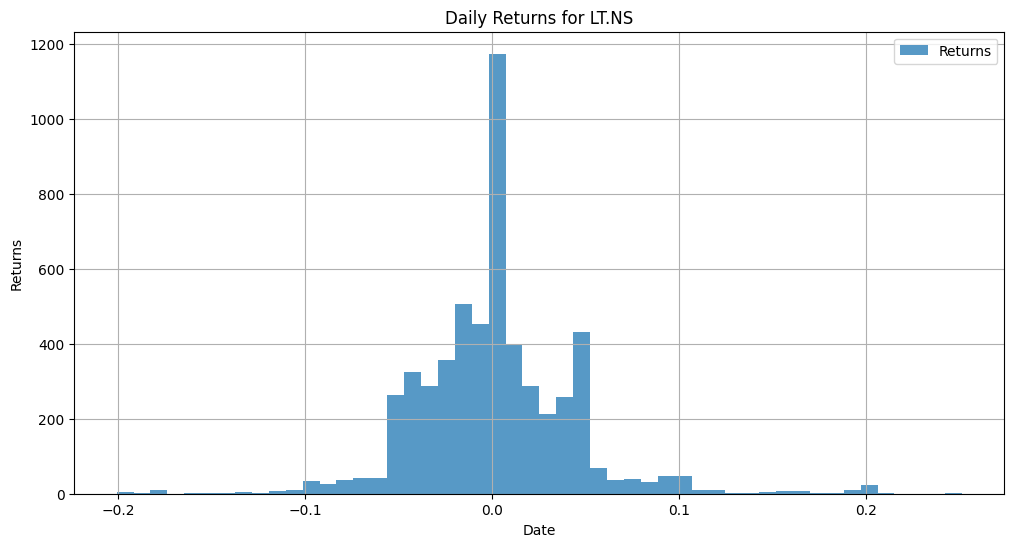

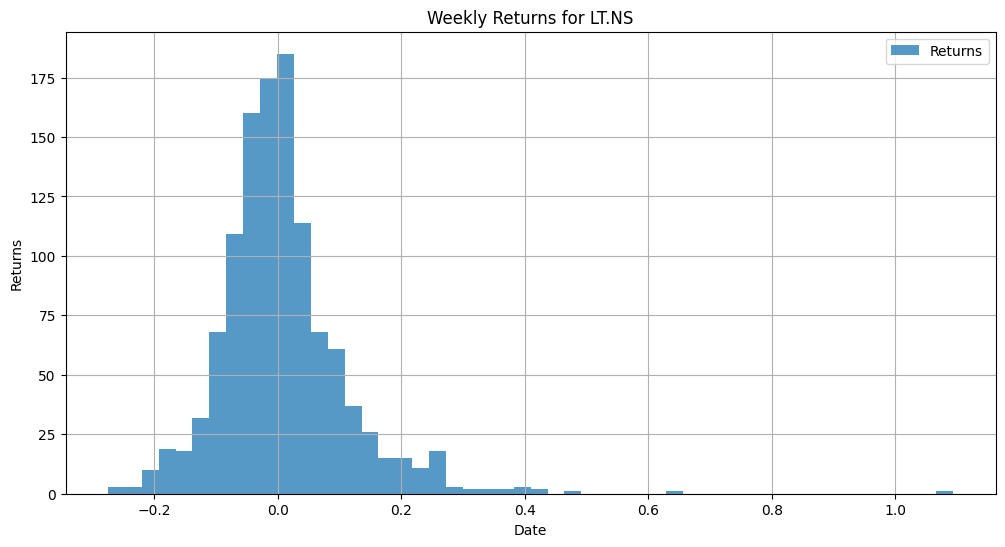

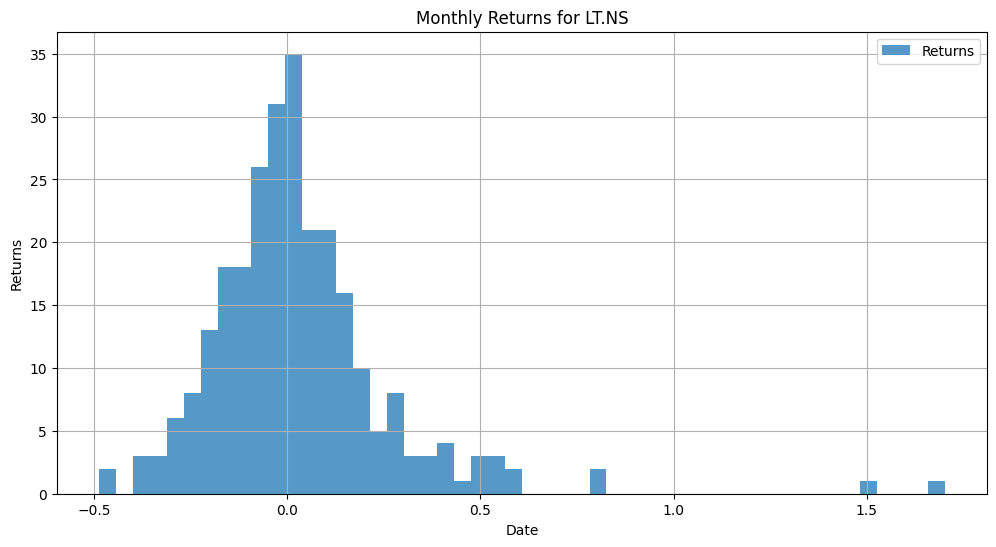

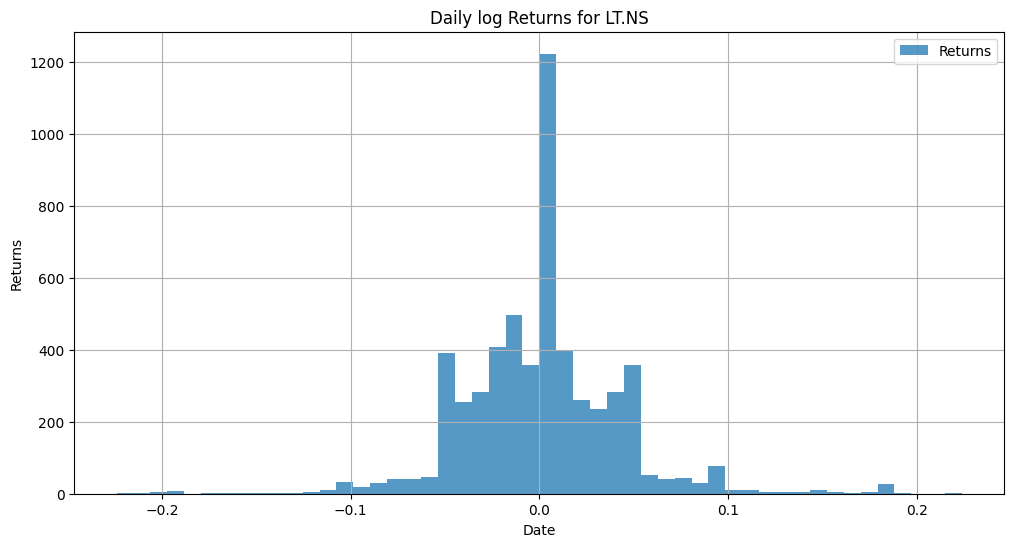

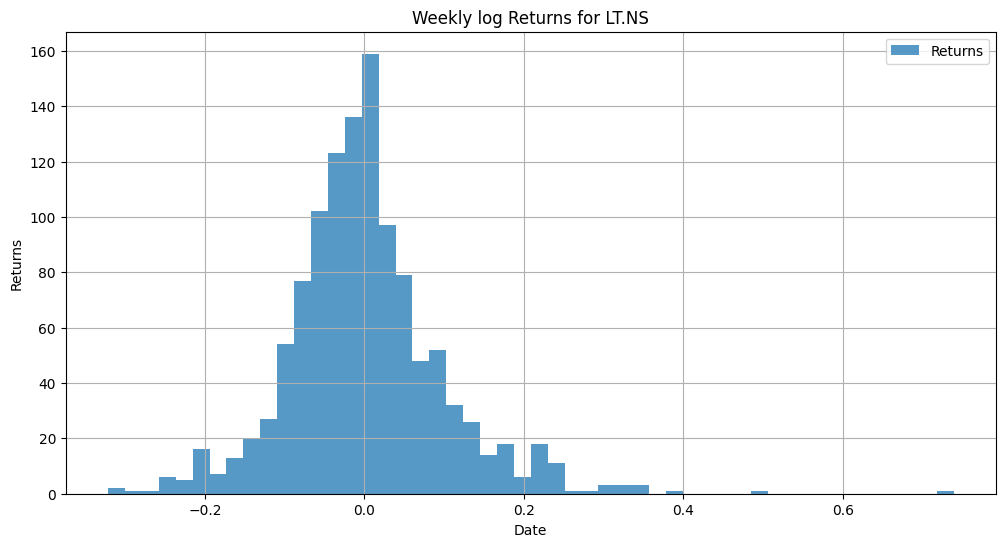

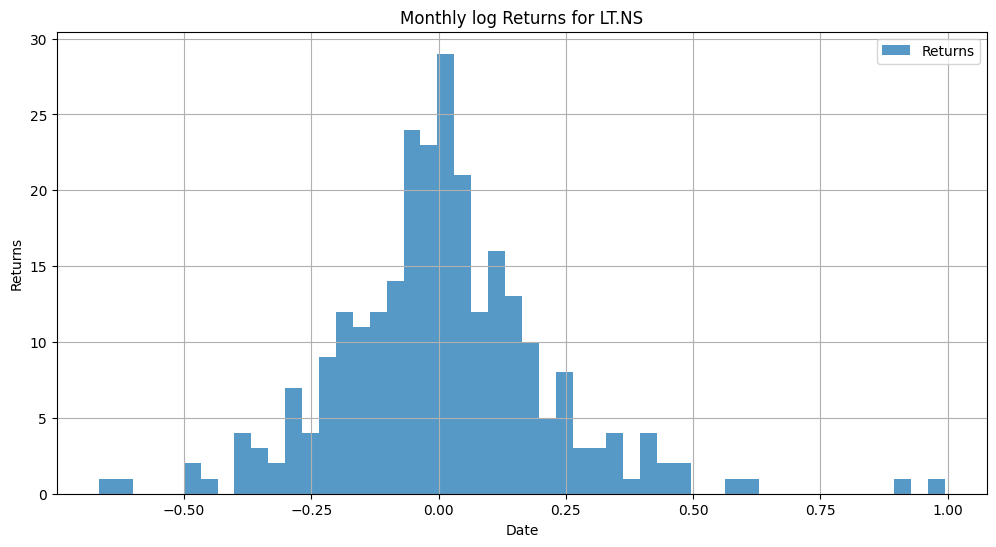

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_returns(df, title):
    plt.figure(figsize=(12, 6))
    plt.hist(df,bins=50, alpha=0.75, label='Returns')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Returns')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example:
daily_returns, daily_log_returns = compute_returns(all_max['SOMATEX.NS'], freq='D')
weekly_returns, weekly_log_returns = compute_returns(all_max['SOMATEX.NS'], freq='W')
monthly_returns, monthly_log_returns = compute_returns(all_max['SOMATEX.NS'], freq='M')

plot_returns(daily_returns, "Daily Returns for LT.NS")
plot_returns(weekly_returns, "Weekly Returns for LT.NS")
plot_returns(monthly_returns, "Monthly Returns for LT.NS")
plot_returns(daily_log_returns, "Daily log Returns for LT.NS")
plot_returns(weekly_log_returns, "Weekly log Returns for LT.NS")
plot_returns(monthly_log_returns, "Monthly log Returns for LT.NS")


Q-Q PLOT


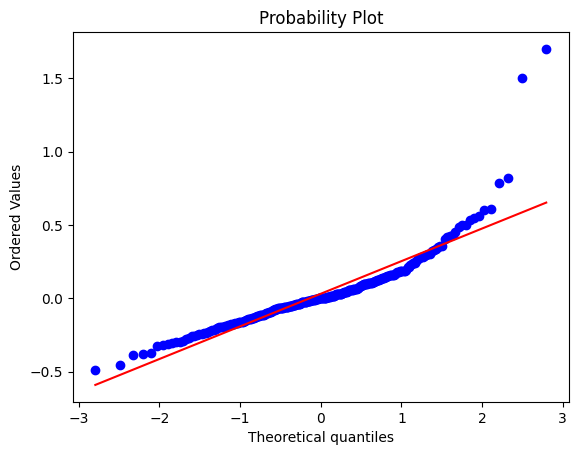

In [ ]:
stats.probplot(monthly_returns, dist='norm', plot=pylab)
print('Q-Q PLOT')

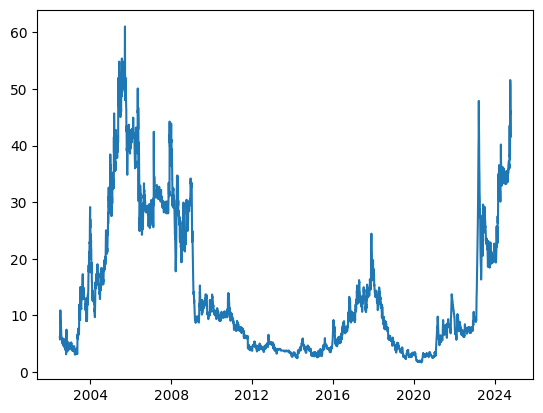

In [ ]:
plt.plot(all_max['SOMATEX.NS']['Adj Close'])

In [ ]:
Mov_avg = all_max['SOMATEX.NS']['Adj Close'].rolling(window=50).mean()

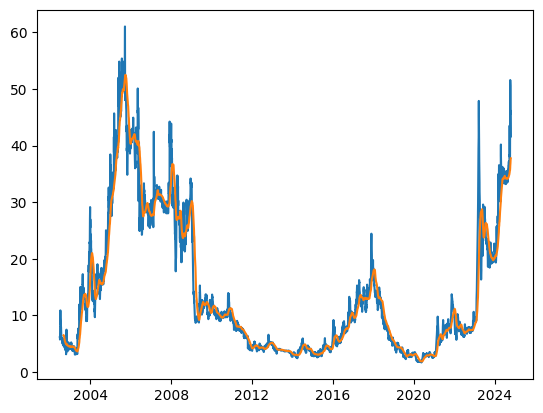

In [ ]:
plt.plot(all_max['SOMATEX.NS']['Adj Close'])
plt.plot(Mov_avg)

In [ ]:
# Prepare data for a few selected stocks
returns_data = {}

for ticker in ALL_tickers:
    # Access the historical data for each ticker from all_max, not ALL_tickers
    returns_data[ticker] = compute_returns(all_max[ticker], freq='D')[0] # Simple daily returns

# Convert the returns data into a DataFrame
returns_df = pd.DataFrame(returns_data)

# Covariance matrix
cov_matrix = returns_df.cov()

# Correlation matrix
corr_matrix = returns_df.corr()

print("Covariance Matrix:\n", cov_matrix)


Covariance Matrix:
                  TCS.NS  RELIANCE.NS  HDFCBANK.NS  SUNPHARMA.NS     LT.NS  \
TCS.NS         0.001327     0.000413     0.000117      0.000073  0.000118   
RELIANCE.NS    0.000413     0.000878     0.000195      0.000126  0.000194   
HDFCBANK.NS    0.000117     0.000195     0.000441      0.000125  0.000185   
SUNPHARMA.NS   0.000073     0.000126     0.000125      0.000529  0.000090   
LT.NS          0.000118     0.000194     0.000185      0.000090  0.000706   
DLF.NS         0.000147     0.000295     0.000255      0.000132  0.000351   
SILVERTUC.NS   0.000021     0.000040     0.000014      0.000023  0.000038   
SBC.NS         0.000043     0.000055     0.000045     -0.000009  0.000059   
PRIMESECU.NS   0.000122     0.000154     0.000138      0.000080  0.000202   
SASTASUNDR.NS  0.000031     0.000088     0.000068      0.000055  0.000100   
STCINDIA.NS    0.000117     0.000203     0.000149      0.000087  0.000240   
PARSVNATH.NS   0.000104     0.000179     0.000139      0

In [ ]:
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
                  TCS.NS  RELIANCE.NS  HDFCBANK.NS  SUNPHARMA.NS     LT.NS  \
TCS.NS         1.000000     0.423154     0.173253      0.102052  0.121397   
RELIANCE.NS    0.423154     1.000000     0.312746      0.184412  0.272379   
HDFCBANK.NS    0.173253     0.312746     1.000000      0.259061  0.377479   
SUNPHARMA.NS   0.102052     0.184412     0.259061      1.000000  0.173280   
LT.NS          0.121397     0.272379     0.377479      0.173280  1.000000   
DLF.NS         0.247087     0.453059     0.449118      0.214005  0.522814   
SILVERTUC.NS   0.056300     0.088146     0.035980      0.051276  0.089983   
SBC.NS         0.099904     0.114265     0.098029     -0.021954  0.116160   
PRIMESECU.NS   0.079511     0.136272     0.177453      0.097842  0.180191   
SASTASUNDR.NS  0.060518     0.155039     0.141253      0.093485  0.168681   
STCINDIA.NS    0.088462     0.208113     0.221817      0.122699  0.246412   
PARSVNATH.NS   0.159645     0.253061     0.222067      

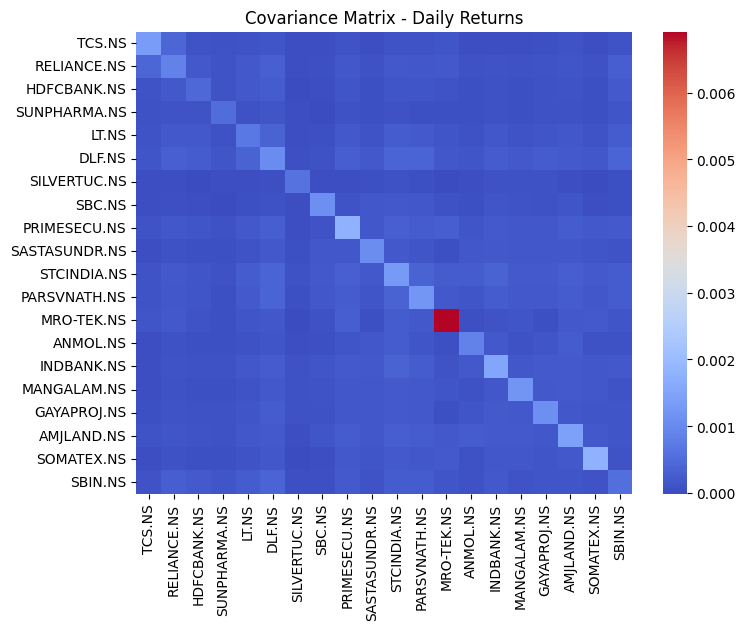

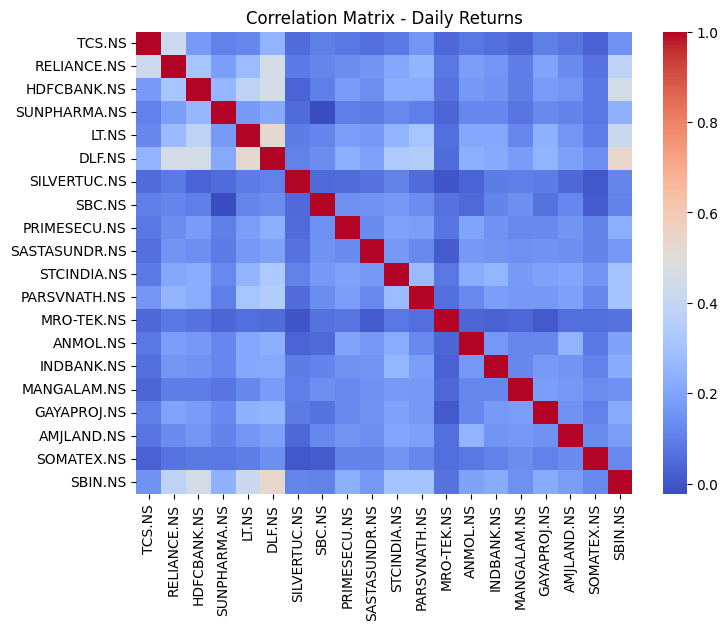

In [ ]:
def plot_heatmap(matrix, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(matrix, annot=False, cmap="coolwarm")
    plt.title(title)
    plt.show()

plot_heatmap(cov_matrix, "Covariance Matrix - Daily Returns")
plot_heatmap(corr_matrix, "Correlation Matrix - Daily Returns")


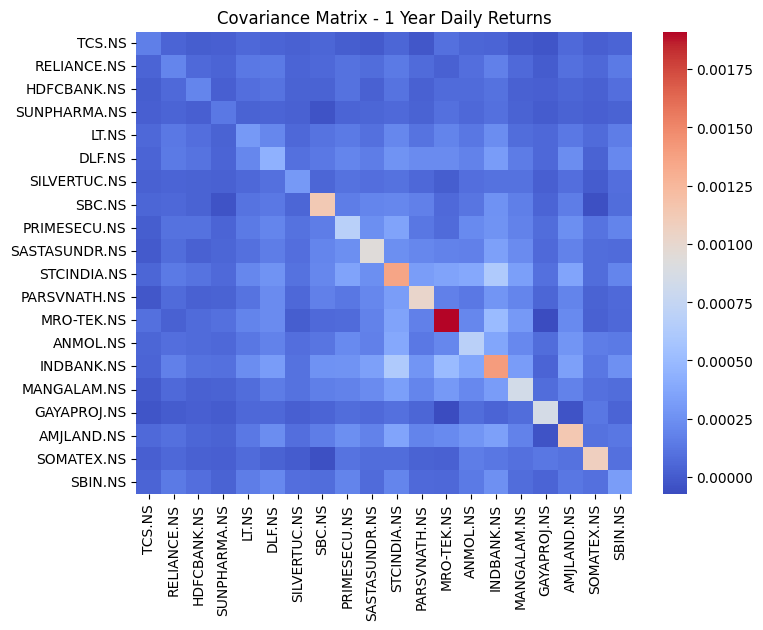

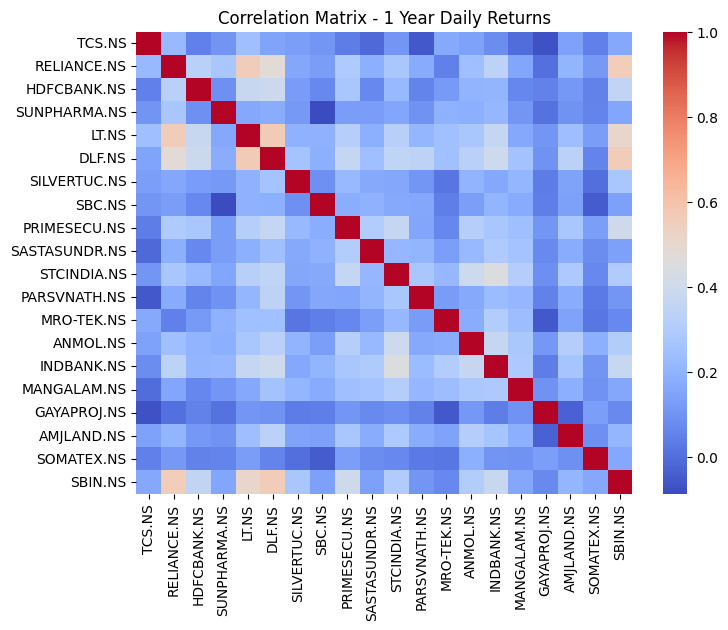

In [ ]:
# Compute for the last 1 year data
returns_1y = {}

for ticker in ALL_tickers:
    returns_1y[ticker] = compute_returns(all_1y[ticker], freq='D')[0]  # Simple daily returns

returns_1y_df = pd.DataFrame(returns_1y)

# Covariance and Correlation for the last year
cov_matrix_1y = returns_1y_df.cov()
corr_matrix_1y = returns_1y_df.corr()

# Visualize
plot_heatmap(cov_matrix_1y, "Covariance Matrix - 1 Year Daily Returns")
plot_heatmap(corr_matrix_1y, "Correlation Matrix - 1 Year Daily Returns")


In [ ]:
import pandas_datareader as pdr
import datetime as dt

# Define the start and end dates for the data
end_date = dt.datetime.now()
start_date = end_date - dt.timedelta(days = 300)

def get_data(ticker, start,end):
  stockData = yf.download(ticker, start = start, end = end)
  stockData = stockData['Close']
  returns = stockData.pct_change()
  # mean_returns = returns.mean()
  # std_returns = returns.std()
  # cov_mat = returns.cov()
  return returns

In [ ]:
returns_data = {}
for ticker in ALL_tickers:
    returns_data[ticker] = get_data(ticker, start_date, end_date)

# Convert to a DataFrame
returns_df = pd.DataFrame(returns_data)

# Compute the mean returns and the covariance matrix
mean_returns = returns_df.mean()
cov_matrix = returns_df.cov()

print("Mean Returns:\n", mean_returns)
print("\nCovariance Matrix:\n", cov_matrix)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

Mean Returns:
 TCS.NS           0.000497
RELIANCE.NS      0.000374
HDFCBANK.NS      0.000105
SUNPHARMA.NS     0.002205
LT.NS            0.000289
DLF.NS           0.001249
SILVERTUC.NS     0.000363
SBC.NS           0.002414
PRIMESECU.NS     0.003579
SASTASUNDR.NS   -0.001235
STCINDIA.NS      0.001375
PARSVNATH.NS     0.003567
MRO-TEK.NS       0.003540
ANMOL.NS        -0.003010
INDBANK.NS       0.001525
MANGALAM.NS      0.001346
GAYAPROJ.NS      0.000461
AMJLAND.NS       0.002233
SOMATEX.NS       0.004412
SBIN.NS          0.001437
dtype: float64

Covariance Matrix:
                  TCS.NS  RELIANCE.NS  HDFCBANK.NS  SUNPHARMA.NS     LT.NS  \
TCS.NS         0.000168     0.000038     0.000006      0.000016  0.000054   
RELIANCE.NS    0.000038     0.000217     0.000063      0.000048  0.000148   
HDFCBANK.NS    0.000006     0.000063     0.000212      0.000015  0.000096   
SUNPHARMA.NS   0.000016     0.000048     0.000015      0.000146  0.000034   
LT.NS          0.000054     0.000148     0.0

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import yfinance as yf
# import datetime as dt

# # Define the tickers and the date range
# ALL_tickers = ['TCS.NS','RELIANCE.NS','HDFCBANK.NS','SUNPHARMA.NS','LT.NS','DLF.NS','SILVERTUC.NS','SBC.NS','PRIMESECU.NS','SASTASUNDR.NS','STCINDIA.NS','PARSVNATH.NS','MRO-TEK.NS','ANMOL.NS','INDBANK.NS','MANGALAM.NS','GAYAPROJ.NS','AMJLAND.NS','SOMATEX.NS','SBIN.NS']
# end_date = dt.datetime.now()
# start_date = end_date - dt.timedelta(days=300)

# # Function to get stock data
# def get_data(ticker, start, end):
#     stockData = yf.download(ticker, start=start, end=end)
#     stockData = stockData['Close']
#     returns = stockData.pct_change().dropna()  # Calculate daily returns
#     return returns

# # Prepare returns DataFrame
# returns_data = {}
# for ticker in ALL_tickers:
#     returns_data[ticker] = get_data(ticker, start_date, end_date)

# returns_df = pd.DataFrame(returns_data)

# # Calculate mean returns and covariance matrix
# mean_returns = returns_df.mean() * 252  # Annualize daily returns
# cov_matrix = returns_df.cov() * 252     # Annualize daily covariance

# # Portfolio simulation
# num_portfolios = 100000
# results = np.zeros((3, num_portfolios))
# weights_record = []

# for i in range(num_portfolios):
#     weights = np.random.random(len(ALL_tickers))
#     weights /= np.sum(weights)  # Normalize weights
#     weights_record.append(weights)

#     # Expected portfolio return
#     portfolio_return = np.dot(weights, mean_returns)

#     # Expected portfolio risk (standard deviation)
#     portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

#     # Save results
#     results[0, i] = portfolio_return
#     results[1, i] = portfolio_std_dev
#     results[2, i] = results[0, i] / results[1, i]  # Sharpe ratio

# # Convert to DataFrame for easier manipulation
# results_df = pd.DataFrame(results.T, columns=['Return', 'Risk', 'Sharpe Ratio'])

# # Create the efficient frontier (optional)
# sorted_results = results_df.sort_values(by=['Return'])
# efficient_portfolios = pd.DataFrame(columns=['Return', 'Risk', 'Sharpe Ratio'])
# min_risk = float('inf')

# for idx, row in sorted_results.iterrows():
#     if row['Risk'] < min_risk:
#         efficient_portfolios = pd.concat([efficient_portfolios, pd.DataFrame([row])], ignore_index=True)
#         min_risk = row['Risk']

# # Prompt user to input their desired annual return percentage
# desired_return_percentage = float(input("Enter your desired annual return percentage (e.g., 10 for 10%): "))
# desired_return = desired_return_percentage / 100  # Convert percentage to decimal

# # Adjust approach: Find the closest portfolio to the desired return, comparing directly to all portfolios
# closest_portfolio_idx = (results_df['Return'] - desired_return).abs().idxmin()
# closest_portfolio = results_df.iloc[closest_portfolio_idx]
# closest_weights = weights_record[closest_portfolio_idx]

# # Print out details of the closest portfolio
# print(f"\nPortfolio closest to the desired return of {desired_return_percentage}%:")
# print(f"Expected Return: {closest_portfolio['Return']*100:.2f}%")
# print(f"Risk (Standard Deviation): {closest_portfolio['Risk']*100:.2f}%")
# print(f"Sharpe Ratio: {closest_portfolio['Sharpe Ratio']:.2f}")
# print("\nPortfolio Weights:")
# for ticker, weight in zip(ALL_tickers, closest_weights):
#     print(f"{ticker}: {weight*100:.2f}%")

# # Plotting
# plt.figure(figsize=(10, 6))

In [ ]:
def RandomPf():
  share = np.exp(np.random.randn(20))
  share = share/np.sum(share)
  return share

In [ ]:
def IncomePf(Rand):
  return np.matmul(mean_returns.values, Rand)

def RiskPf(Rand):
  return np.sqrt(np.matmul(np.matmul(Rand , cov_matrix.values) ,Rand))

In [ ]:
combinations = 100000
risk = np.zeros(combinations)
income = np.zeros(combinations)
portfolio = np.zeros((combinations, 20))

# Function, which create new combinations of shares
for i in range(combinations):
    rand = RandomPf()

    portfolio[i, :] = rand
    risk[i] = RiskPf(rand)
    income[i] = IncomePf(rand)

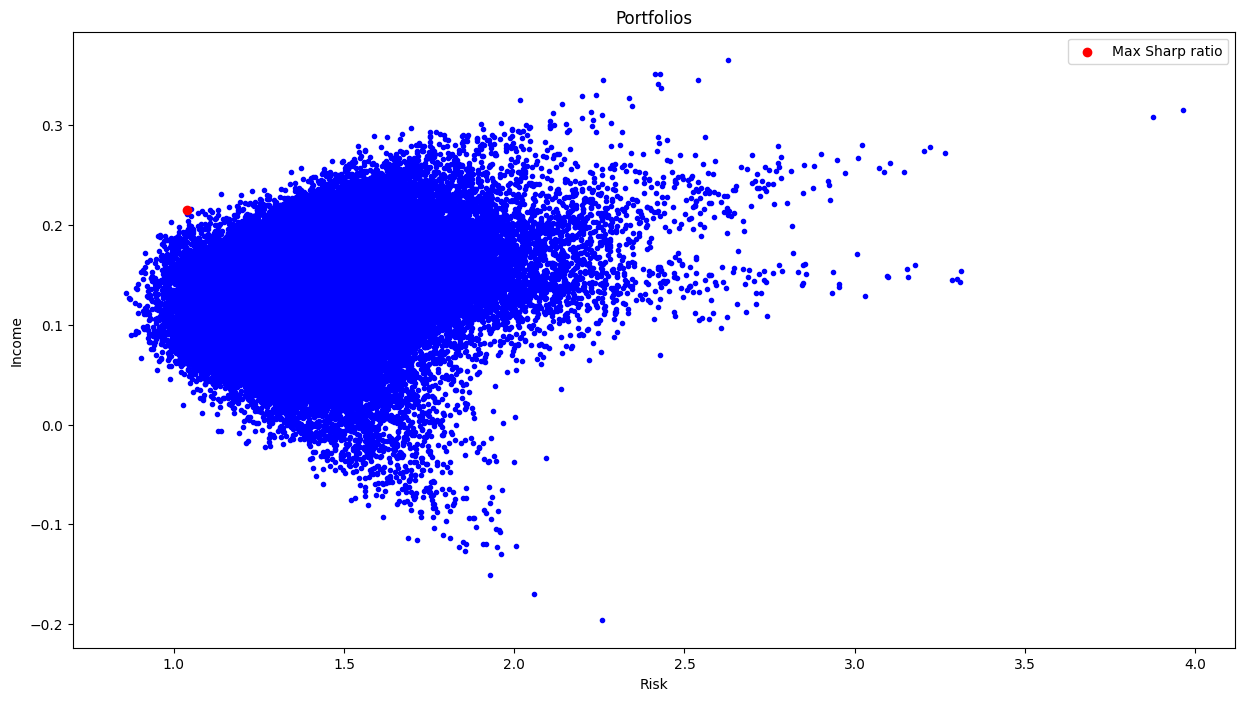

In [ ]:
plt.figure(figsize=(15, 8))
plt.scatter(risk * 100, income * 100, c="b", marker=".")
plt.xlabel("Risk")
plt.ylabel("Income")
plt.title("Portfolios")
MaxSharpRatio = np.argmax(income / risk)
plt.scatter([risk[MaxSharpRatio] * 100], [income[MaxSharpRatio] * 100], c="r", marker="o", label="Max Sharp ratio")
plt.legend()
plt.show()

In [ ]:
best_pf = portfolio[MaxSharpRatio]
for i in range(len(ALL_tickers)):
    print("{} : {}".format(ALL_tickers[i], best_pf[i]))

TCS.NS : 0.0168405071695866
RELIANCE.NS : 0.01480877823354836
HDFCBANK.NS : 0.007673253755311022
SUNPHARMA.NS : 0.5685630727086214
LT.NS : 0.026859583765543725
DLF.NS : 0.026338079207575495
SILVERTUC.NS : 0.039433381210309516
SBC.NS : 0.03625294892724817
PRIMESECU.NS : 0.15687834054526795
SASTASUNDR.NS : 0.0020362077276468746
STCINDIA.NS : 0.006135614839439296
PARSVNATH.NS : 0.0039362297639782716
MRO-TEK.NS : 0.0089864553878483
ANMOL.NS : 0.0019641773259903342
INDBANK.NS : 0.0036184226661166844
MANGALAM.NS : 0.006270198825730852
GAYAPROJ.NS : 0.025918376555980945
AMJLAND.NS : 0.03289347482460384
SOMATEX.NS : 0.00479090142825292
SBIN.NS : 0.009801995131399335


In [ ]:
#Now we need to design an optimisation problem that either takes in desired risk and finds max return for that OR takes the desired return and finds the lowest risk

In [ ]:
!pip install riskfolio-lib

In [ ]:
import riskfolio as rp
method_mu = 'hist'
hist = True
method_cov = 'hist'
model = 'Classic'
rm = 'MV'
obj = 'MaxRet'
rf = 0.02
l = 0.1

In [ ]:
port = rp.Portfolio(returns=returns_df)
port.assets_stats(method_mu=method_mu, method_cov=method_cov)
w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l)

ValueError: array must not contain infs or NaNs

In [ ]:
ax = rp.plot_pie(w)

In [ ]:
frontier = port.efficient_frontier(model =  model , rm = rm , rf = rf, points = 60 , hist = hist)
ax = rp.plot_frontier(w_frontier=frontier, mu = port.mu, cov = port.cov, returns = returns_df , rm = rm , rf = rf , cmap = 'viridis', w = w )

In [ ]:
ax = rp.plot_frontier_area(w_frontier = frontier,cmap = 'tab20')

In [ ]:
x = rp.jupyter_report(returns_df,w,rm=rm)

NameError: name 'w' is not defined